<a href="https://colab.research.google.com/github/wahyuvlntn/Realization-of-State-Revenue-Forecasting-/blob/main/Data_Battle_Penerimaan_Negara.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from statsmodels.tsa.arima.model import ARIMA
from sklearn.impute import SimpleImputer

In [ ]:
!gdown 1pWvB32vErCKZe4wA6Wq_qmGZSckmDpU1
!gdown 1qW-s3HqPUBJv2Tse8UHiApVQ4ON3StfC
!gdown 16Wpi4fk4IjHaeSBGT2xNCW5fRHtW0JTj

Downloading...
From: https://drive.google.com/uc?id=1pWvB32vErCKZe4wA6Wq_qmGZSckmDpU1
To: /content/data_training.csv
100% 15.4M/15.4M [00:00<00:00, 135MB/s]
Downloading...
From: https://drive.google.com/uc?id=1qW-s3HqPUBJv2Tse8UHiApVQ4ON3StfC
To: /content/data_testing.csv
100% 1.44M/1.44M [00:00<00:00, 138MB/s]
Downloading...
From: https://drive.google.com/uc?id=16Wpi4fk4IjHaeSBGT2xNCW5fRHtW0JTj
To: /content/sample_submission.csv
100% 742k/742k [00:00<00:00, 94.4MB/s]


In [ ]:
data = pd.read_csv('data_training.csv')
data_test = pd.read_csv('data_testing.csv')
data.head()

,Date;X1;X2;Y
0,07/01/12; ;;71864183015
1,07/01/12; ;A;32640358590
2,07/01/12; ;B;30845698143
3,07/01/12; ;C;39580783266
4,07/01/12; ;D;30442401289


In [ ]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47049 entries, 0 to 47048
Data columns (total 1 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   id;Date;X1;X2  47049 non-null  object
dtypes: object(1)
memory usage: 367.7+ KB


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 429999 entries, 0 to 429998
Data columns (total 1 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   Date;X1;X2;Y  429999 non-null  object
dtypes: object(1)
memory usage: 3.3+ MB


In [ ]:
data.columns

Index(['Date;X1;X2;Y'], dtype='object')

In [ ]:
data[['Date', 'X1', 'X2', 'Y']] = data['Date;X1;X2;Y'].str.split(';', expand=True)
data.drop(['Date;X1;X2;Y'], axis=1, inplace=True)

In [ ]:
data_test[['id','Date', 'X1', 'X2']] = data_test['id;Date;X1;X2'].str.split(';', expand=True)
data_test.drop(['id;Date;X1;X2'], axis=1, inplace=True)

In [ ]:
data.head()

,Date,X1,X2,Y
0,07/01/12,,,71864183015
1,07/01/12,,A,32640358590
2,07/01/12,,B,30845698143
3,07/01/12,,C,39580783266
4,07/01/12,,D,30442401289


In [ ]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47049 entries, 0 to 47048
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    47049 non-null  object
 1   X1      47049 non-null  object
 2   X2      47049 non-null  object
dtypes: object(3)
memory usage: 1.1+ MB


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 429999 entries, 0 to 429998
Data columns (total 1 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   Date;X1;X2;Y  429999 non-null  object
dtypes: object(1)
memory usage: 3.3+ MB


In [ ]:
data = data[~data.isin([' ']).any(axis=1)]

In [ ]:
data_test = data_test[~data_test.isin(['']).any(axis=1)]

In [ ]:
data_test.head()

,id,Date,X1,X2
0,b1,2022-07-30,Propinsi 04,Z
1,b2,2022-07-30,Propinsi 05,G
2,b3,2022-07-30,Propinsi 05,A
3,b4,2022-07-30,Propinsi 05,B
4,b5,2022-07-30,Propinsi 05,C


In [ ]:
data.head()

,Date,X1,X2,Y
22,07/01/12,Propinsi 01,,29912162820
23,07/01/12,Propinsi 01,A,30201910290
24,07/01/12,Propinsi 01,B,29766205860
25,07/01/12,Propinsi 01,C,31439746777
26,07/01/12,Propinsi 01,D,29933747878


In [ ]:
data_test.replace({'X1': {' ': 'Propinsi 15'},
                 'X2': {'': 'G'}}, inplace=True)

In [ ]:
data_test['X1'] = data_test['X1'].replace(' ', method='ffill')  # Menggunakan metode forward fill
data_test['X2'] = data_test['X2'].replace('', method='ffill')

In [ ]:
data_test['X2'].value_counts()

Z    4151
G    2130
P    2120
F    2116
C    2114
M    2113
L    2112
N    2111
J    2111
H    2110
I    2105
S    2104
K    2103
Q    2099
A    2096
D    2076
E    2074
R    2070
B    2069
O    2058
T    1910
U    1097
Name: X2, dtype: int64

In [ ]:
data['X2'].value_counts()

F    18738
G    18738
C    18734
Z    18732
M    18729
H    18729
O    18728
K    18724
N    18724
I    18723
J    18711
Q    18705
A    18698
P    18660
S    18653
D    18593
R    18588
L    18575
E    18559
B    18425
     18272
T    17061
U    10542
Name: X2, dtype: int64

In [ ]:
data = data.drop(data[data['X2'] == ""].index)

In [ ]:
data.head()

,Date,X1,X2,Y
23,07/01/12,Propinsi 01,A,30201910290
24,07/01/12,Propinsi 01,B,29766205860
25,07/01/12,Propinsi 01,C,31439746777
26,07/01/12,Propinsi 01,D,29933747878
27,07/01/12,Propinsi 01,E,29781077009


In [ ]:
data_test = data_test.drop(columns=["id"])

In [ ]:
data.head()

,Date,X1,X2,Y
23,07/01/12,Propinsi 01,A,30201910290
24,07/01/12,Propinsi 01,B,29766205860
25,07/01/12,Propinsi 01,C,31439746777
26,07/01/12,Propinsi 01,D,29933747878
27,07/01/12,Propinsi 01,E,29781077009


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 401069 entries, 23 to 429998
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   Date    401069 non-null  object
 1   X1      401069 non-null  object
 2   X2      401069 non-null  object
 3   Y       401069 non-null  object
dtypes: object(4)
memory usage: 15.3+ MB


In [ ]:
data=data.dropna()

In [ ]:
data['Date'] = pd.to_datetime(data["Date"])
data_test['Date'] = pd.to_datetime(data_test["Date"])

In [ ]:
data.head()

,Date,X1,X2,Y
23,2012-07-01,Propinsi 01,A,30201910290
24,2012-07-01,Propinsi 01,B,29766205860
25,2012-07-01,Propinsi 01,C,31439746777
26,2012-07-01,Propinsi 01,D,29933747878
27,2012-07-01,Propinsi 01,E,29781077009


In [ ]:
duplikat = data.drop_duplicates()

In [ ]:
duplikat_test = data_test.drop_duplicates()

In [ ]:
duplikat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 401069 entries, 23 to 429998
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   Date    401069 non-null  datetime64[ns]
 1   X1      401069 non-null  object        
 2   X2      401069 non-null  object        
 3   Y       401069 non-null  object        
dtypes: datetime64[ns](1), object(3)
memory usage: 15.3+ MB


In [ ]:
# data['X2'].value_counts()
# data['X1'].value_counts()
data['Date'].value_counts()

2017-11-11    745
2017-03-18    744
2016-12-24    744
2017-10-14    744
2017-12-23    743
             ... 
2019-08-06    650
2022-07-05    644
2017-01-07    571
2014-02-08    396
2022-07-30     87
Name: Date, Length: 552, dtype: int64

In [ ]:
data['Y']=data['Y'].astype('int64')

In [ ]:
data_encoded = pd.get_dummies(data, columns=['X1', 'X2'], drop_first=True)

In [ ]:
data_encoded_test = pd.get_dummies(data_test, columns=['X1', 'X2'], drop_first=True)

In [ ]:
scaler = MinMaxScaler()
data_encoded['Y'] = scaler.fit_transform(data_encoded[['Y']])

In [ ]:
X = data_encoded.drop(['Date', 'Y'], axis=1)
y = data_encoded['Y']

In [ ]:
X_train = data_encoded.drop(['Date', 'Y'], axis=1)
X_test = data_encoded_test.drop(['id','Date'], axis=1)
y_train = data_encoded['Y']


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Model Regresi Linier
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)
y_pred_lr = model_lr.predict(X_test)

In [ ]:
# Model Random Forest Regressor
model_rf = RandomForestRegressor(random_state=42)
model_rf.fit(X_train, y_train)
y_pred_rf = model_rf.predict(X_test)

In [ ]:
# Model ARIMA
model_arima = ARIMA(data_encoded['Y'], order=(1, 1, 1))
model_arima_fit = model_arima.fit()
y_pred_arima = model_arima_fit.predict(len(data_encoded), len(data_encoded) + len(y_test) - 1, typ='levels')

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this

In [ ]:
# Evaluasi menggunakan MAE
mae_lr = mean_absolute_error(y_test, y_pred_lr)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mae_arima = mean_absolute_error(y_test, y_pred_arima)

print(f'MAE Regresi Linier: {mae_lr}')
print(f'MAE Random Forest: {mae_rf}')
print(f'MAE ARIMA: {mae_arima}')

MAE Regresi Linier: 0.0017239209208685885
MAE Random Forest: 0.0008246590175543683
MAE ARIMA: 0.001324543915705049


In [ ]:
# Tampilkan hasil prediksi
result_df = pd.DataFrame({
    'id': data_test['id'],
    # 'Y': y_pred_lr,
    'Y': y_pred_rf,
    # 'Predicted_ARIMA': y_pred_new_arima
})

print(result_df)

           id         Y
0          b1  0.304292
1          b2  0.304309
2          b3  0.304595
3          b4  0.304443
4          b5  0.305100
...       ...       ...
47044  b47045  0.304212
47045  b47046  0.304204
47046  b47047  0.304245
47047  b47048  0.304193
47048  b47049  0.304323

[47049 rows x 2 columns]


In [ ]:
result_df.to_csv('/content/sample_submission_coba.csv', index=False)

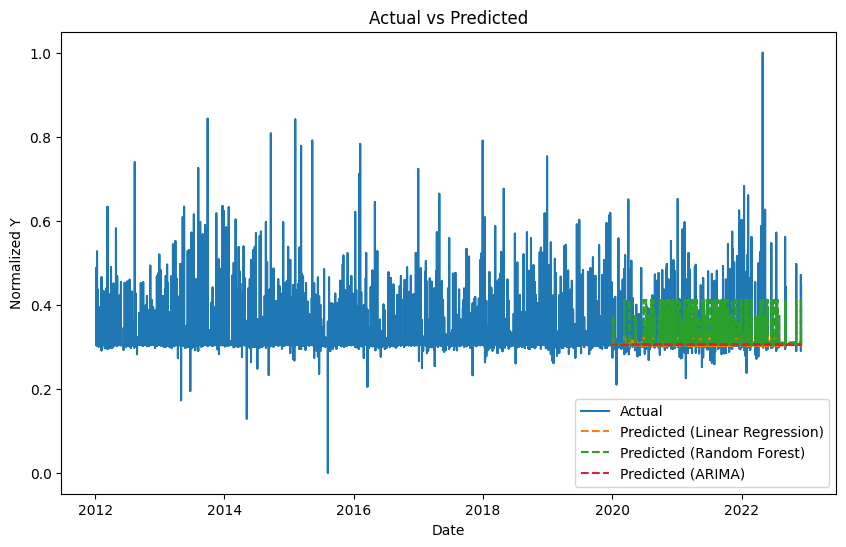

In [ ]:
# Plot hasil prediksi
plt.figure(figsize=(10, 6))
plt.plot(data['Date'], data_encoded['Y'], label='Actual')
plt.plot(data['Date'].iloc[-len(y_test):], y_pred_lr, label='Predicted (Linear Regression)', linestyle='dashed')
plt.plot(data['Date'].iloc[-len(y_test):], y_pred_rf, label='Predicted (Random Forest)', linestyle='dashed')
plt.plot(data['Date'].iloc[-len(y_test):], y_pred_arima, label='Predicted (ARIMA)', linestyle='dashed')
plt.title('Actual vs Predicted')
plt.xlabel('Date')
plt.ylabel('Normalized Y')
plt.legend()
plt.show()